In [13]:
from plotting.style_setup import setup_plot_style
from metrics_extractor import MetricsExtractor, PrometheusSource, metrics_io
from datetime import datetime, timedelta, timezone
from plotting.plot_templates import *
setup_plot_style()

# Available Metrics

In [14]:
type_exp = "mod"


selected_metrics = [
    "mc_players_online_local{world='world'}", #0
    "mc_tps", #1
    "quantile(0.5, mc_tps)", #2
    "quantile(0.95, mc_tps)", #3
    "sum(mc_players_online_local{world='world'})", #4
    "count(count by(server_name) (mc_tps))", #5
    "mc_mspt_seconds_10_mean", #6
    "rate(container_network_receive_bytes_total{pod=~'multipaper-master-.*'}[1m])", #7
    "rate(container_network_transmit_bytes_total{pod=~'multipaper-master-.*'}[1m])", #8
    "rate(container_network_receive_bytes_total{pod=~'multipaper-server-.*'}[1m])", #9
    "rate(container_network_transmit_bytes_total{pod=~'multipaper-server-.*'}[1m])", #10
    "container_memory_usage_bytes{container='multipaper-master-velocity'}", #11
    "container_memory_usage_bytes{container='multipaper-server'}", #12
    "rate(container_cpu_usage_seconds_total{container='multipaper-master-velocity'}[1m])", #13
    "rate(container_cpu_usage_seconds_total{container='multipaper-server'}[1m])", #14
    "sum by(owner) (mc_chunk_ownership)", #15
    "minecraft_world_loaded_chunks{world='world'}", #16
    "mc_player_location", #17
    "sum by(chunk_owner) (mc_player_location)", #18
    "server_latency", #19
    "avg(server_latency)", #20
    "max(server_latency)", #21
    "min(server_latency)", #22 
    "quantile(0.5, server_latency)", #23
    "quantile(0.99, server_latency)", #24
    "avg(mc_tps)", #25
    "avg(mc_mspt_seconds_10_mean)", #26
    "quantile(0.95, mc_mspt_seconds_10_mean)", #27
    "quantile(0.5, mc_mspt_seconds_10_mean)", #28
    "max(mc_tps)", #29
    "min(mc_tps)", #30
    "min(mc_mspt_seconds_10_mean)", #31
    "max(mc_mspt_seconds_10_mean)", #32
    # "sum(mc_tps)", #33
    # "quantile(0.99, mc_tps)", #34
    # "minecraft_tick_duration_seconds_bucket", #35
    # "sum(rate(minecraft_tick_duration_seconds_bucket[2s])) by(le)", #36
    # "mc_chunk_ownership", #37
]


### Change Time Zone (to UTC + 02:00)

Only if needed

In [15]:
def change_timezone(input_time):
    """
    Change the timezone of the timestamp from UTC to UTC +020:00 (Europe/Berlin).
    """
    utc = timezone.utc
    utc_plus_2 = timezone(timedelta(hours=2))

    from_time = datetime.strptime(input_time["from"], "%Y-%m-%d %H:%M:%S").replace(tzinfo=utc)
    to_time = datetime.strptime(input_time["to"], "%Y-%m-%d %H:%M:%S").replace(tzinfo=utc)

    from_time_local = from_time.astimezone(utc_plus_2)
    to_time_local = to_time.astimezone(utc_plus_2)

    return from_time_local, to_time_local

# Extract Metrics

In [16]:
experiment = "scaling_migration_1"

input_time = {"from":"2025-06-17 00:03:49","to":"2025-06-17 00:50:08"}

# Uncomment the following lines to use the original time parsing UTC +00
from_time = datetime.strptime(input_time["from"], "%Y-%m-%d %H:%M:%S")
to_time = datetime.strptime(input_time["to"], "%Y-%m-%d %H:%M:%S")

# Use the change_timezone function to convert the time to UTC +02:00
# from_time, to_time = change_timezone(input_time)

# UNCOMMENT THE FOLLOWING LINES TO EXTRACT METRICS FROM PROMETHEUS
prometheus = PrometheusSource(url="http://localhost:46547/")
extractor = MetricsExtractor()

#metrics_io.save_metrics(selected_metrics, from_time, to_time, prometheus, extractor, experiment, type_exp)

# Plots

## 2 Servers

### Idle + Interval

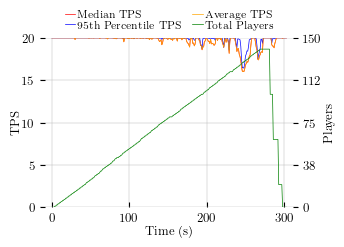

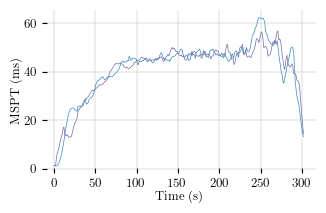

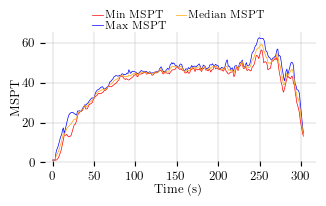

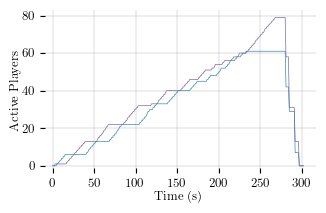

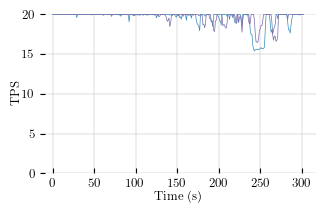

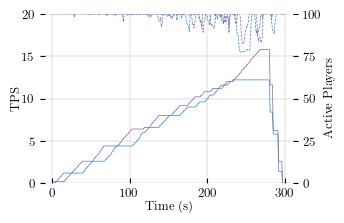

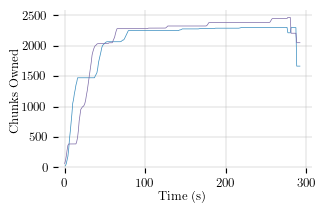

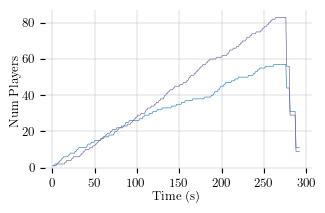

In [17]:
experiment = "2s_idle_interval"
tps_players_plot(experiment, selected_metrics, type_exp)
mspt_plot(experiment, selected_metrics, type_exp)
mspt_stats_plot(experiment, selected_metrics, type_exp)
players_servers_plot(experiment, selected_metrics, type_exp)
tps_servers_plot(experiment, selected_metrics, type_exp)
player_tps_server_plot(experiment, selected_metrics, type_exp)
chunk_ownership_plot(experiment, selected_metrics, type_exp)
players_chunks_owner_plot(experiment, selected_metrics, type_exp)

# 4 Servers Interval

## Idle

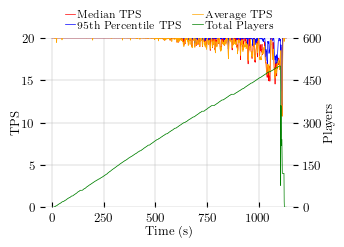

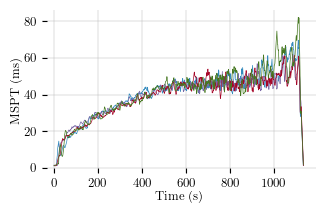

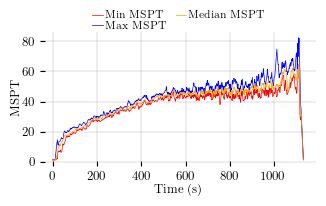

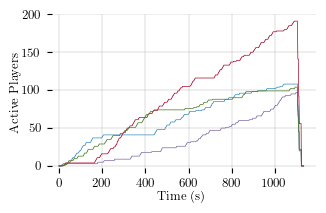

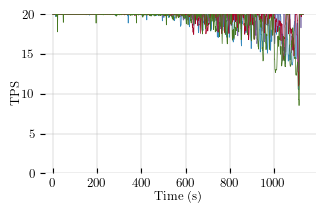

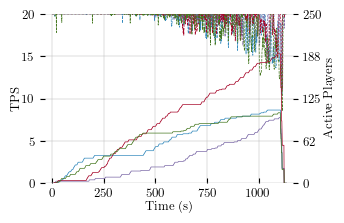

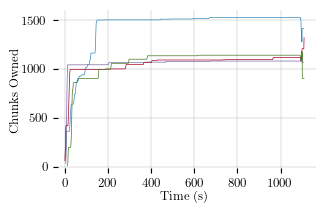

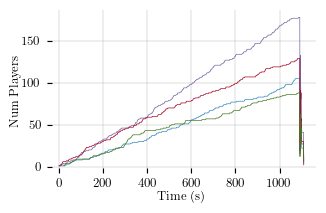

In [18]:
experiment = "4s_idle_interval"
tps_players_plot(experiment, selected_metrics, type_exp)
mspt_plot(experiment, selected_metrics, type_exp)
mspt_stats_plot(experiment, selected_metrics, type_exp)
players_servers_plot(experiment, selected_metrics, type_exp)
tps_servers_plot(experiment, selected_metrics, type_exp)
player_tps_server_plot(experiment, selected_metrics, type_exp)
chunk_ownership_plot(experiment, selected_metrics, type_exp)
players_chunks_owner_plot(experiment, selected_metrics, type_exp)

# Scaling

## Idle interval 1s

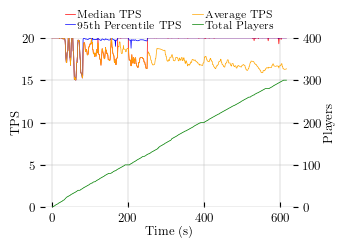

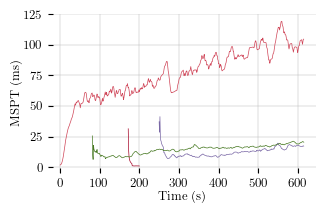

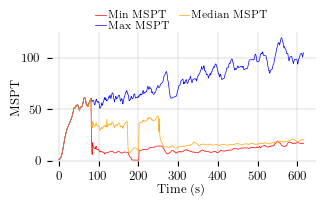

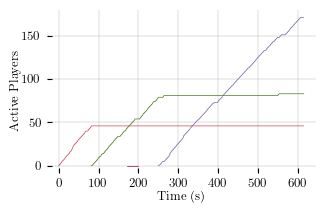

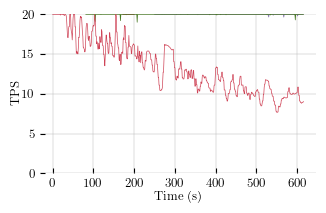

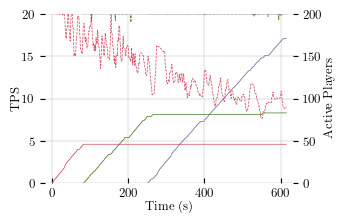

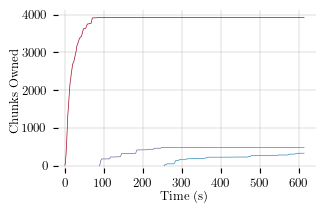

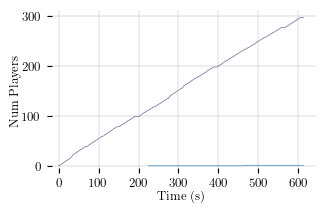

In [19]:
experiment = "scaling_idle_interval_1s"
tps_players_plot(experiment, selected_metrics, type_exp)
mspt_plot(experiment, selected_metrics, type_exp)
mspt_stats_plot(experiment, selected_metrics, type_exp)
players_servers_plot(experiment, selected_metrics, type_exp)
tps_servers_plot(experiment, selected_metrics, type_exp)
player_tps_server_plot(experiment, selected_metrics, type_exp)
chunk_ownership_plot(experiment, selected_metrics, type_exp)
players_chunks_owner_plot(experiment, selected_metrics, type_exp)

## Idle interval 5s

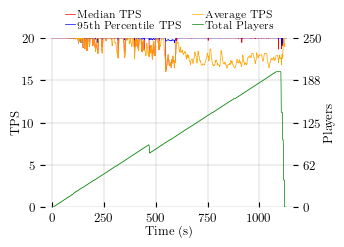

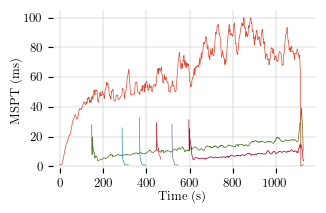

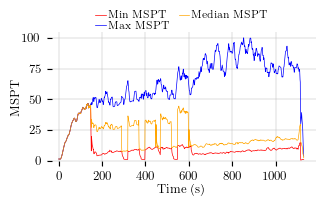

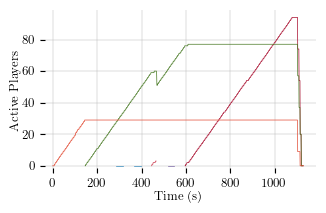

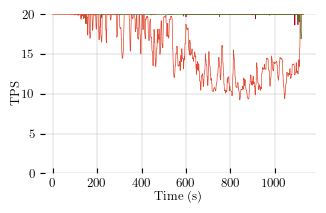

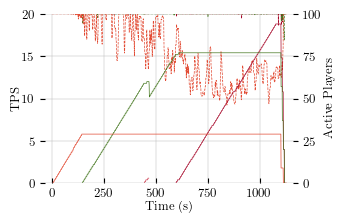

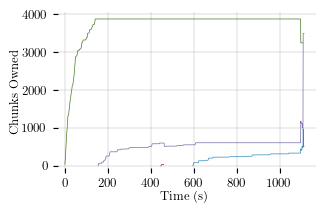

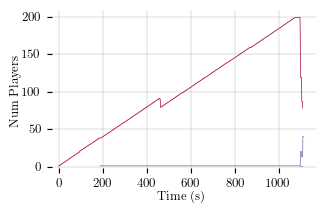

In [20]:
experiment = "scaling_idle_interval_5s"
tps_players_plot(experiment, selected_metrics, type_exp)
mspt_plot(experiment, selected_metrics, type_exp)
mspt_stats_plot(experiment, selected_metrics, type_exp)
players_servers_plot(experiment, selected_metrics, type_exp)
tps_servers_plot(experiment, selected_metrics, type_exp)
player_tps_server_plot(experiment, selected_metrics, type_exp)
chunk_ownership_plot(experiment, selected_metrics, type_exp)
players_chunks_owner_plot(experiment, selected_metrics, type_exp)

## Idle batch

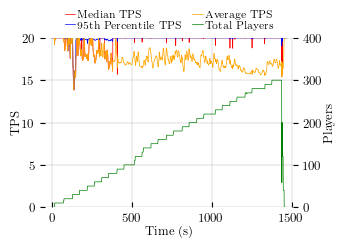

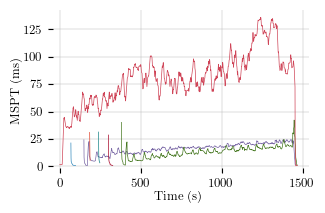

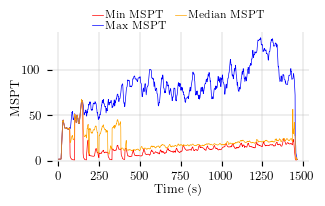

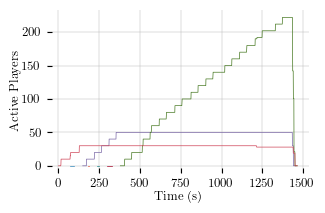

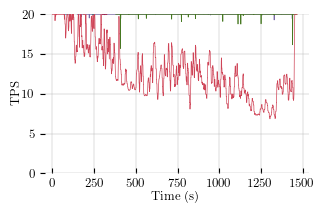

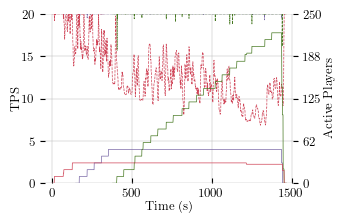

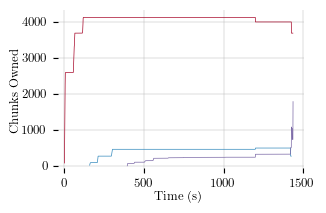

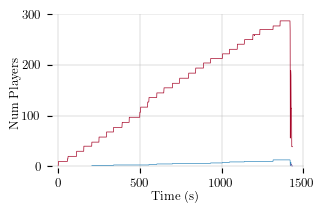

In [21]:
experiment = "scaling_idle_batch"
tps_players_plot(experiment, selected_metrics, type_exp)
mspt_plot(experiment, selected_metrics, type_exp)
mspt_stats_plot(experiment, selected_metrics, type_exp)
players_servers_plot(experiment, selected_metrics, type_exp)
tps_servers_plot(experiment, selected_metrics, type_exp)
player_tps_server_plot(experiment, selected_metrics, type_exp)
chunk_ownership_plot(experiment, selected_metrics, type_exp)
players_chunks_owner_plot(experiment, selected_metrics, type_exp)

## Walk interval 1s

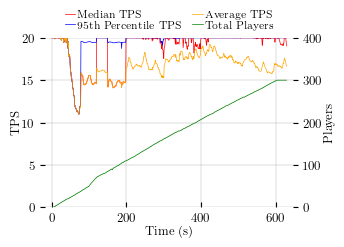

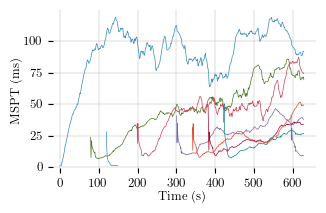

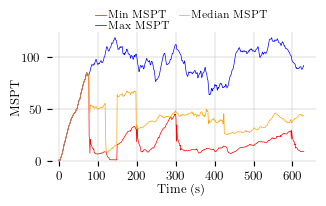

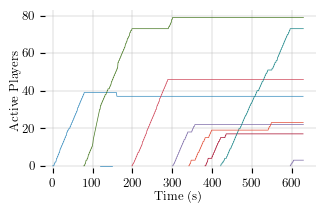

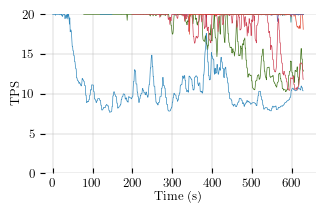

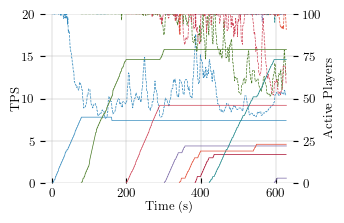

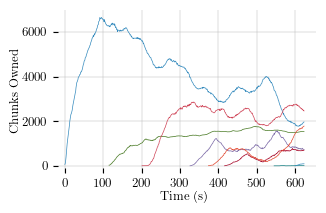

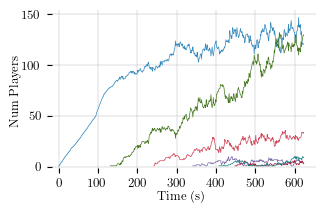

In [22]:
experiment = "scaling_walk_interval_1s"
tps_players_plot(experiment, selected_metrics, type_exp)
mspt_plot(experiment, selected_metrics, type_exp)
mspt_stats_plot(experiment, selected_metrics, type_exp)
players_servers_plot(experiment, selected_metrics, type_exp)
tps_servers_plot(experiment, selected_metrics, type_exp)
player_tps_server_plot(experiment, selected_metrics, type_exp)
chunk_ownership_plot(experiment, selected_metrics, type_exp)
players_chunks_owner_plot(experiment, selected_metrics, type_exp)

## Walk interval 5s

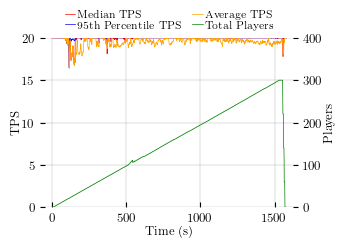

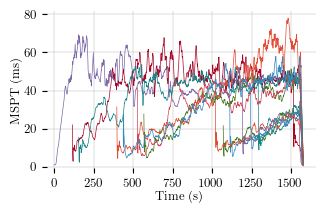

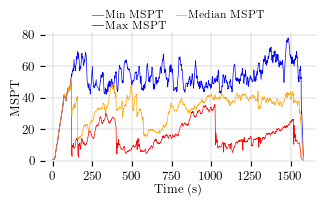

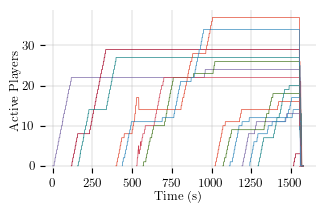

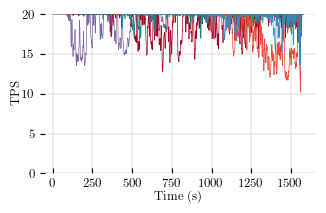

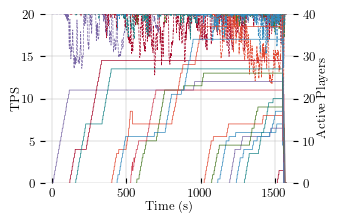

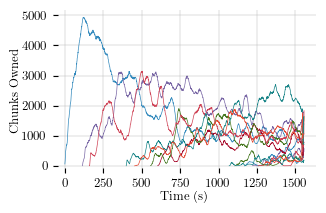

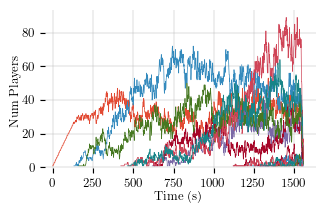

In [23]:
experiment = "scaling_walk_interval_5s"
tps_players_plot(experiment, selected_metrics, type_exp)
mspt_plot(experiment, selected_metrics, type_exp)
mspt_stats_plot(experiment, selected_metrics, type_exp)
players_servers_plot(experiment, selected_metrics, type_exp)
tps_servers_plot(experiment, selected_metrics, type_exp)
player_tps_server_plot(experiment, selected_metrics, type_exp)
chunk_ownership_plot(experiment, selected_metrics, type_exp)
players_chunks_owner_plot(experiment, selected_metrics, type_exp)

# Migration

## walk 3 servers 1 overloaded
40-10-11


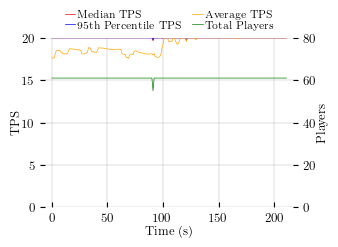

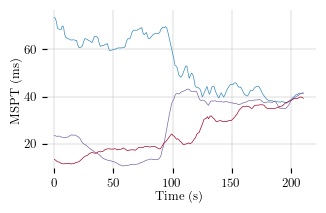

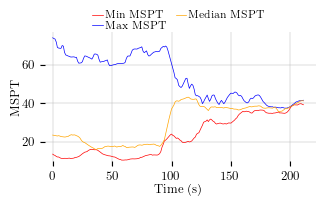

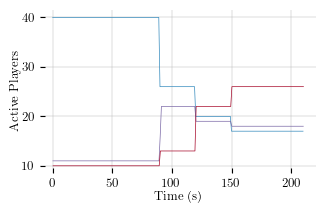

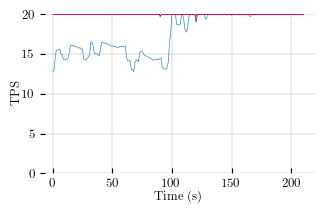

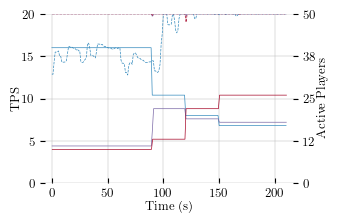

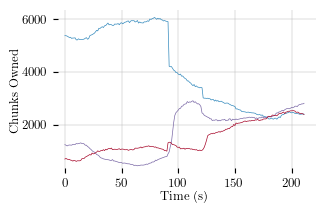

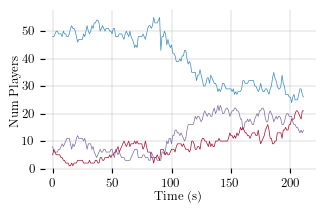

In [24]:
experiment = "migration_walk_3s"
tps_players_plot(experiment, selected_metrics, type_exp)
mspt_plot(experiment, selected_metrics, type_exp)
mspt_stats_plot(experiment, selected_metrics, type_exp)
players_servers_plot(experiment, selected_metrics, type_exp)
tps_servers_plot(experiment, selected_metrics, type_exp)
player_tps_server_plot(experiment, selected_metrics, type_exp)
chunk_ownership_plot(experiment, selected_metrics, type_exp)
players_chunks_owner_plot(experiment, selected_metrics, type_exp)

## walk 5 servers 2 overloaded
40-39-15-14-13

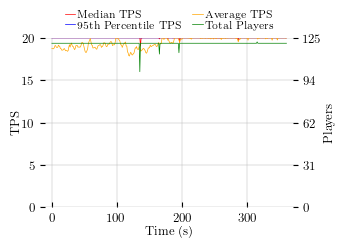

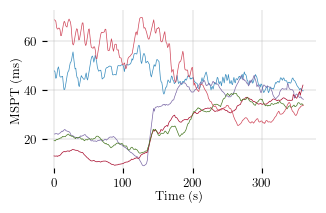

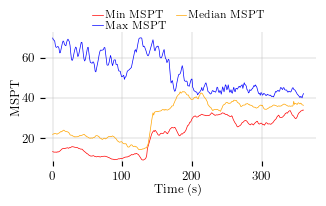

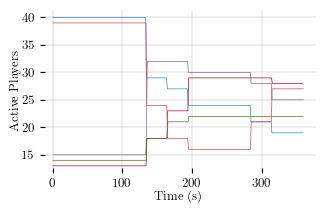

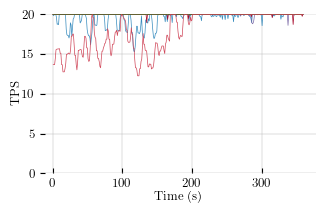

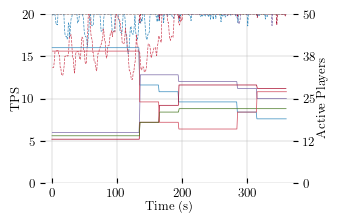

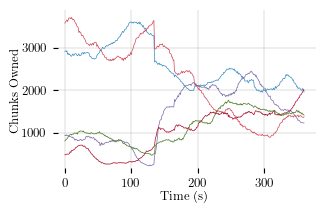

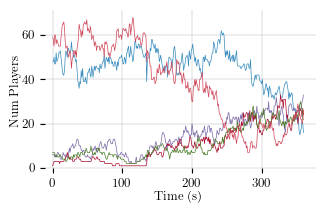

In [25]:
experiment = "migration_walk_5s"
tps_players_plot(experiment, selected_metrics, type_exp)
mspt_plot(experiment, selected_metrics, type_exp)
mspt_stats_plot(experiment, selected_metrics, type_exp)
players_servers_plot(experiment, selected_metrics, type_exp)
tps_servers_plot(experiment, selected_metrics, type_exp)
player_tps_server_plot(experiment, selected_metrics, type_exp)
chunk_ownership_plot(experiment, selected_metrics, type_exp)
players_chunks_owner_plot(experiment, selected_metrics, type_exp)

# scaling & migration walk

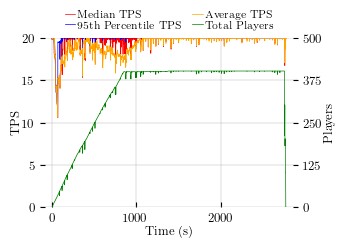

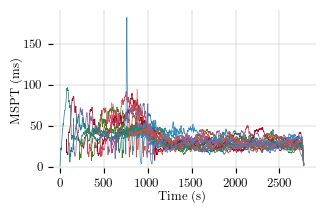

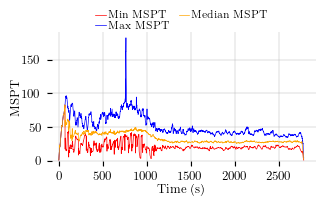

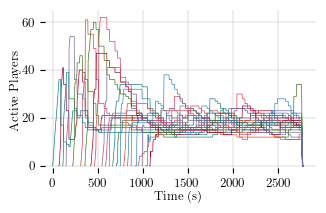

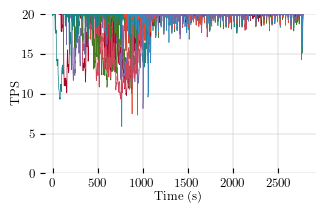

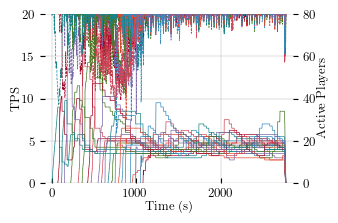

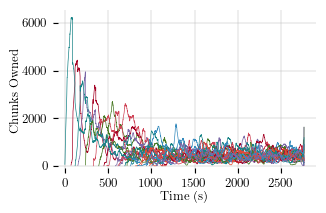

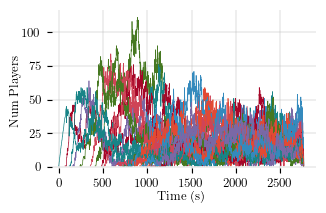

In [41]:
experiment = "scaling_migration_1"
tps_players_plot(experiment, selected_metrics, type_exp)
mspt_plot(experiment, selected_metrics, type_exp)
mspt_stats_plot(experiment, selected_metrics, type_exp)
players_servers_plot(experiment, selected_metrics, type_exp)
tps_servers_plot(experiment, selected_metrics, type_exp)
player_tps_server_plot(experiment, selected_metrics, type_exp)
chunk_ownership_plot(experiment, selected_metrics, type_exp)
players_chunks_owner_plot(experiment, selected_metrics, type_exp)


# server latency


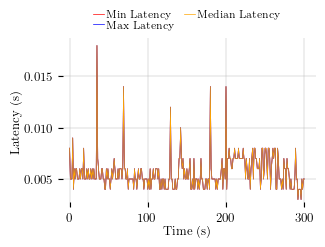

In [27]:
experiment = "1s_latency_1msg"
latency_plot(experiment, selected_metrics, type_exp)

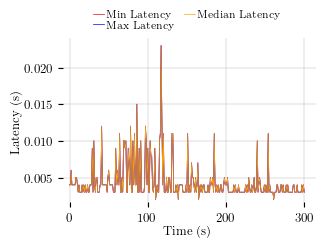

In [28]:
experiment = "1s_latency_32msg"
latency_plot(experiment, selected_metrics, type_exp)

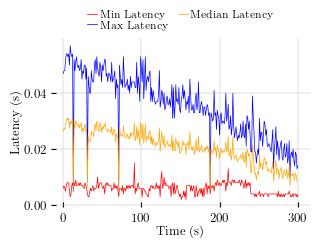

In [29]:
experiment = "2s_latency_1msg"
latency_plot(experiment, selected_metrics, type_exp)

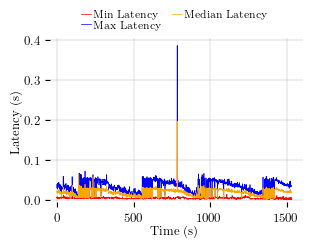

In [30]:
experiment = "2s_latency_1msg_pattern"
latency_plot(experiment, selected_metrics, type_exp)

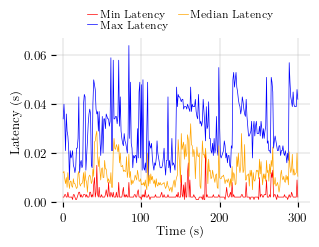

In [31]:
experiment = "2s_latency_64msg"
latency_plot(experiment, selected_metrics, type_exp)

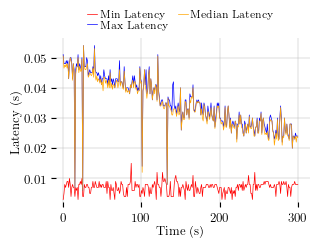

In [32]:
experiment = "4s_latency_1msg"
latency_plot(experiment, selected_metrics, type_exp)

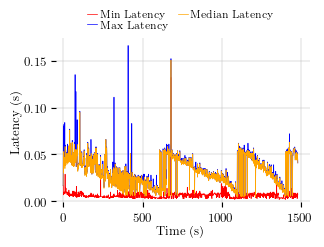

In [33]:
experiment = "4s_latency_1msg_pattern"
latency_plot(experiment, selected_metrics, type_exp)

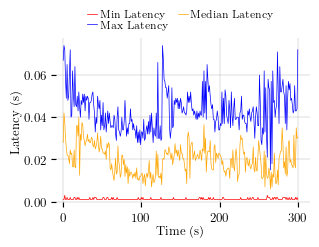

In [34]:
experiment = "4s_latency_64msg"
latency_plot(experiment, selected_metrics, type_exp)

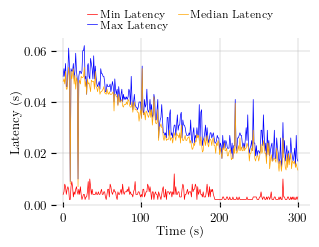

In [35]:
experiment = "8s_latency_1msg"
latency_plot(experiment, selected_metrics, type_exp)

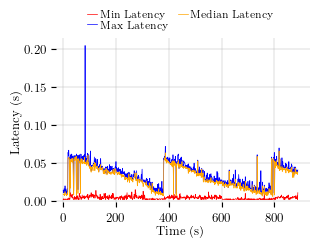

In [36]:
experiment = "8s_latency_1msg_pattern"
latency_plot(experiment, selected_metrics, type_exp)

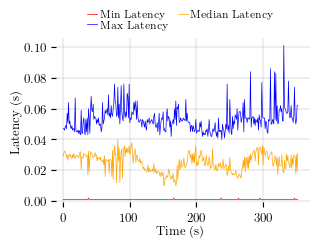

In [37]:
experiment = "8s_latency_64msg"
latency_plot(experiment, selected_metrics, type_exp)

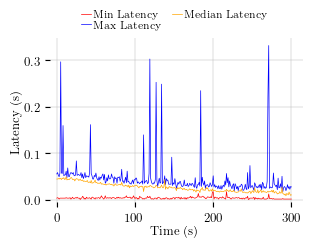

In [38]:
experiment = "16s_latency_1msg"
latency_plot(experiment, selected_metrics, type_exp)

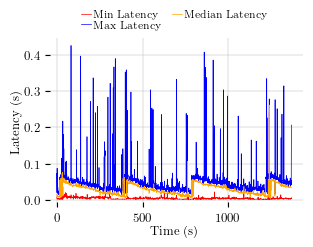

In [39]:
experiment = "16s_latency_1msg_pattern"
latency_plot(experiment, selected_metrics, type_exp)

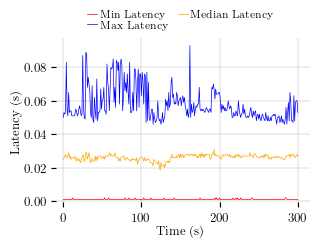

In [40]:
experiment = "16s_latency_32msg"
latency_plot(experiment, selected_metrics, type_exp)